# Fourier Transformation

Fourier was a Mathematician in 1822. He give Fourier Series and Forier Transform to convert a single into frequency domain.

### Fourier Series: 

Fourier series states that, Periodic signals can be represented into sum of sines and cosines when multiplied with a certain weight. 

#### How it is calculated: 

Since as we have seen in the frequency domain, that in order to process an image in frequency domain, we need to first convert it to frequency domain and then take inverse of the output to convert back into spatial domain. That why fourier series and fourier transform has two formuls. One for conversion and other for back to spatial domain. 

### Fourier Transform:

The Fourier transform states that the non periodic signals whose area under the curve is finite can also be represented into integrals of sines and cosines after being multiplied by the certain weights.

Fourier transform has many wide applications that include, image compression, filtering and image analysis.


### Difference between Fourier Series and Transform ?

The difference between them is fourier series is applied on periodic signals and fourier transform applied for non periodic signals.

### Which one applied on images?

Images are non periodic, so fourier transform is used to convert them into frequency domain. 

## Discrete Fourier Transform:

Digital images are working on discrete fourier transform. 

Fourier term of a sinusoid include three things:
1. Spatial Frequency 2. Magnitude 3. Phase

Spatial frequency directly realtes with brightness of image. 

Magnitude of sinusoid directly relates with contrast.

Contrast is difference between maximum and minimum pixel intensity. 

Phase contain color information.


## Steps to find fourier transform

**Step 1:** Load image 

**Step 2:** Convert image to grayscale.

**Step 3:** Use cv2.dft function to compute Discrete Fourier Transform.

**Step 4:** Shift the zero frequency component of the fourier transform using numpy.fft.fftshift().

**Step 5:** Compute magniude of the fouier transform using the numpy.abs(). This step is optional.

**Step 6:** Scale the magnitude of fourier transform using cv2.normalize(). This step also optonal.

**Step 7:** Show image.

In [1]:
import numpy as np 
import cv2

image = cv2.imread(r"C:\Users\pcc\Desktop\DSC_3073.JPG")
image= cv2.resize(image, (500,500))

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fourier=cv2.dft(np.float32(gray),flags=cv2.DFT_COMPLEX_OUTPUT)

fourier_shift= np.fft.fftshift(fourier)

magnitude = 20* np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

magnitude= cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)

cv2.imshow("image", magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

### find and plot magnitude spectrum.

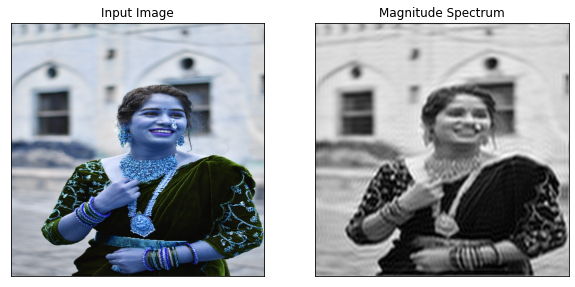

In [10]:
import matplotlib.pyplot as plt 

DFT=cv2.dft(np.float32(gray),flags=cv2.DFT_COMPLEX_OUTPUT)

shift= np.fft.fftshift(DFT)
row,col= shift.shape[0],shift.shape[1]
center_row, center_col= row//2,col//2

mask= np.zeros((row,col,2),np.uint8)
mask[center_row- 40: center_row + 40, center_col - 60: center_col+60]=1

fft_shift= shift*mask 
fft_ifft_shift=np.fft.ifftshift(fft_shift)
image_then= cv2.idft(fft_ifft_shift)

image_then= cv2.magnitude(image_then[:,:,0],image_then[:,:,1])

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(image,cmap="gray")
plt.title("Input Image")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(image_then,cmap="gray")
plt.title("Magnitude Spectrum")
plt.xticks([])
plt.yticks([])
plt.show()

Certainly! This code appears to be related to applying a frequency domain operation (specifically, a high-pass filtering operation) to an image using the Discrete Fourier Transform (DFT) and inverse DFT. Let's break down the code step by step to understand what it does:

```python
import matplotlib.pyplot as plt
```
This line imports the `matplotlib.pyplot` module, which is commonly used for creating plots and visualizations in Python.

```python
DFT = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
```
In this line, the DFT (Discrete Fourier Transform) is applied to an input grayscale image (`gray`). It uses the `cv2.dft` function from the OpenCV library to compute the DFT. The `np.float32(gray)` converts the input grayscale image to floating-point format, which is required for the DFT computation. The `flags=cv2.DFT_COMPLEX_OUTPUT` flag indicates that the DFT result should be represented in complex number format (real and imaginary parts).

```python
shift = np.fft.fftshift(DFT)
```
Here, the result of the DFT is shifted using the `np.fft.fftshift` function. Shifting the DFT result is a common practice to move the zero-frequency component to the center of the spectrum.

```python
row, col = shift.shape[0], shift.shape[1]
center_row, center_col = row // 2, col // 2
```
These lines calculate the dimensions of the shifted DFT result (`shift`) and then calculate the coordinates of the center pixel in the shifted DFT.

```python
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 40: center_row + 40, center_col - 60: center_col + 60] = 1
```
A mask is created as a NumPy array of zeros with the same dimensions as the shifted DFT result. This mask will be used to apply the high-pass filtering operation. The center region of the mask is set to ones, creating a rectangular window. This window defines the region where the high-frequency components are retained, while the low-frequency components outside this window will be attenuated.

```python
fft_shift = shift * mask
```
The mask is element-wise multiplied with the shifted DFT result (`shift`). This step effectively attenuates the low-frequency components outside the rectangular window defined by the mask.

```python
fft_ifft_shift = np.fft.ifftshift(fft_shift)
```
The inverse operation of shifting is performed using `np.fft.ifftshift`, which brings the modified DFT result (`fft_shift`) back to its original position.

```python
image_then = cv2.idft(fft_ifft_shift)
```
The inverse DFT is applied to the modified DFT result (`fft_ifft_shift`) using the `cv2.idft` function. This computes the inverse DFT to transform the modified frequency-domain data back to the spatial domain.

```python
image_then = cv2.magnitude(image_then[:, :, 0], image_then[:, :, 1])
```
The `cv2.magnitude` function is used to compute the magnitude of the complex-valued image obtained from the inverse DFT. This magnitude represents the intensity or strength of the pixel values.

In summary, this code performs a high-pass filtering operation using the frequency domain. It calculates the DFT of a grayscale image, applies a rectangular window mask to attenuate low-frequency components, and then computes the inverse DFT to obtain the filtered image. The filtered image is represented by its magnitude, indicating the strength of high-frequency components.